# 이진분류

## 퍼셉트론
* 마지막에 샘플 분류를 위하여 계단 함수(step function) 사용
    * 계단 함수는 z가 0보다 크거나 같으면 1(양성 클래스)로, 0보다 작으면 -1(음성 클래스)로 분류
    * 게단 함수의 결과는 학습에 활용

## 아달린
* 적응형 선형 뉴런
* 계단 함수의 결과는 예측에 활용
* 역방향 계산이 출력 이후가 아닌 선형 함수 출력 이후에 진행됨

## 로지스틱 회귀
* 활성화 함수: 선형 함수 통과하여 얻은 z를 임계 함수에 보내기 전에 변형시키는데 사용하는 함수
    * 활성화 함수는 반드시 비선형 함수여야 함
* 마지막에는 임계 함수를 이용하여 예측
* 로지스틱 회귀의 대표적인 활성화 함수: 시그모이드(Sigmoid) 함수

## 위스콘신 유방암 데이터셋

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [2]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

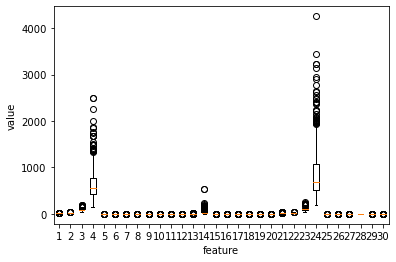

In [3]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [4]:
# 박스 플롯에서 유난히 눈에 띄는 특성이 무엇인지 확인
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [5]:
# 타깃 데이터 확인하기
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [6]:
# 데이터셋을 변수에 할당
x = cancer.data
y = cancer.target

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [8]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [9]:
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
        
    def forpass(self, x):
        # 직선 방정식 계산
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        # 가중치에 대한 gradient 계산
        w_grad = x * err
        # 절편에 대한 gradient 계산
        b_grad = 1 * err
        return w_grad, b_grad
    
    # 훈련
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

    # 활성화 함수
    def activation(self, z):
        # 시그모이드 계산
        a = 1 / (1 + np.exp(-z))
        return a
    
    # 예측
    def predict(self, x):
        # 정방향 계산
        z = [self.forpass(x_i) for x_i in x]
        # 활성화 함수 적용
        a = self.activation(np.array(z))
        return a > 0.5

In [10]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

<ipython-input-9-77badd19450f>:34: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


In [11]:
np.mean(neuron.predict(x_test) == y_test)

<ipython-input-9-77badd19450f>:34: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8245614035087719

## 단일층 신경망

In [12]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
        
    def forpass(self, x):
        # 직선 방정식 계산
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        # 가중치에 대한 gradient 계산
        w_grad = x * err
        # 절편에 대한 gradient 계산
        b_grad = 1 * err
        return w_grad, b_grad
    
    def add_bias(self, x):
        # 행렬의 맨 앞에 1로 채워진 열 벡터 추가
        return np.c_[np.ones((x.shape[0], 1)), x]
    
    # 훈련
    def fit(self, x, y, epochs=100):
        # 가중치 초기화
        self.w = np.ones(x.shape[1])
        # 절편 초기화
        self.b = 0
        # epoch만큼 반복
        for i in range(epochs):
            loss = 0
            # 인덱스 섞기
            indexes = np.random.permutation(np.arange(len(x)))
            # 모든 샘플에 대해 반복
            for i in indexes:
                # 정방향 계산
                z = self.forpass(x[i])
                # 활성화 함수 적용
                a = self.activation(z)
                # 오차 계산
                err = -(y[i] - a)
                # 역방향 계산
                w_grad, b_grad = self.backprop(x[i], err)
                # 가중치 업데이트
                self.w -= w_grad
                # 절편 업데이트
                self.b -= b_grad
                # 안전한 로그 계산을 위하여 클리핑 후 손실 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1 - a))
            # 에포크마다 평균 손실 저장
            self.losses.append(loss / len(y))

    # 활성화 함수
    def activation(self, z):
        # 시그모이드 계산
        a = 1 / (1 + np.exp(-z))
        return a
    
    # 예측
    def predict(self, x):
        # 정방향 계산
        z = [self.forpass(x_i) for x_i in x]
        # 활성화 함수 적용
        a = self.activation(np.array(z))
        return a > 0.5
    
    # 정확도 계산
    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [13]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

<ipython-input-12-272d04231b2f>:57: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.9385964912280702

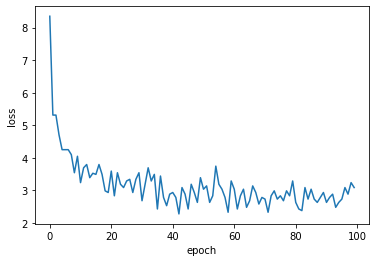

In [14]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 사이킷런을 활용한 로지스틱 회귀 수행

In [15]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)

In [16]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [17]:
sgd.predict(x_test[:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])